# 한국교통안전공단_배출가스 검사 정보_20220818

## 라이브러리

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### pandas option

In [123]:
pd.options.display.float_format = '{:.9}'.format
# pd.reset_option('display.float_format')
# pd.set_option('display.float_format', None)

## 데이터 분석

In [15]:
df = pd.read_csv('gas.csv', encoding='EUC-kr')
df.head()

,검사방법,연료,적용법령,차종,제작시작일자,제작종료일자,적용시작일자,적용종료일자,차량최소중량,차량최대중량,일산화탄소-기준치,탄화수소-기준치,질소산화물-기준치,매연-기준치,매연-기준치(촉매)
0,부하검사(LUG DOWN),경유,대기환경보전법,전차종,2008-01-01,9999-12-31,2010-07-01,9999-12-31,0,5500,,,,20,
1,부하검사(LUG DOWN),경유,대기환경보전법,전차종,2001-01-01,2007-12-31,2010-07-01,9999-12-31,0,5500,,,,50,
2,부하검사(LUG DOWN),경유,대기환경보전법,전차종,1996-01-01,2000-12-31,2010-07-01,9999-12-31,0,5500,,,,60,
3,부하검사(LUG DOWN),경유,대기환경보전법,전차종,1901-01-01,1995-12-31,2010-07-01,9999-12-31,0,5500,,,,70,
4,부하검사(LUG DOWN),경유,대기환경보전법,전차종,2008-01-01,9999-12-31,2010-07-01,9999-12-31,5501,9999999,,,,15,


### 기본 분석

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   검사방법        4913 non-null   object
 1   연료          4913 non-null   object
 2   적용법령        4913 non-null   object
 3   차종          4913 non-null   object
 4   제작시작일자      4913 non-null   object
 5   제작종료일자      4913 non-null   object
 6   적용시작일자      4913 non-null   object
 7   적용종료일자      4913 non-null   object
 8   차량최소중량      4913 non-null   int64 
 9   차량최대중량      4913 non-null   int64 
 10  일산화탄소-기준치   4913 non-null   object
 11  탄화수소-기준치    4913 non-null   object
 12  질소산화물-기준치   4913 non-null   object
 13  매연-기준치      4668 non-null   object
 14  매연-기준치(촉매)  4668 non-null   object
dtypes: int64(2), object(13)
memory usage: 575.9+ KB


In [16]:
df.describe(include=['O'])

,검사방법,연료,적용법령,차종,제작시작일자,제작종료일자,적용시작일자,적용종료일자,일산화탄소-기준치,탄화수소-기준치,질소산화물-기준치,매연-기준치,매연-기준치(촉매)
count,4913,4913,4913,4913,4913,4913,4913,4913,4913,4913,4913,4668,4668
unique,6,9,2,19,13,13,8,7,120,48,124,14,7
top,부하검사(ASM-Idling),엘피지,대기환경보전법,승용중형,2001-01-01,9999-12-31,2010-04-01,9999-12-31,,100,,,
freq,3873,676,4877,527,1144,1477,2731,3414,322,438,1038,4330,4408


In [19]:
df.describe()

,차량최소중량,차량최대중량
count,4913.0,4913.0
mean,1359.2526,3398467.96
std,1106.36376,4735617.54
min,0.0,999.0
25%,0.0,1749.0
50%,1600.0,2499.0
75%,2250.0,9999999.0
max,5501.0,9999999.0


In [21]:
df.columns

Index(['검사방법', '연료', '적용법령', '차종', '제작시작일자', '제작종료일자', '적용시작일자', '적용종료일자',
       '차량최소중량', '차량최대중량', '일산화탄소-기준치', '탄화수소-기준치', '질소산화물-기준치', '매연-기준치',
       '매연-기준치(촉매)'],
      dtype='object')

### 검사방법

In [205]:
df['검사방법'].unique()

array(['부하검사(LUG DOWN)', '무부하검사(정지가동)', '무부하검사(급가속)', '무부하검사(TSI)',
       '부하검사(KD-147)', '부하검사(ASM-Idling)'], dtype=object)

In [206]:
df['검사방법'].value_counts()

부하검사(ASM-Idling)    3873
무부하검사(정지가동)          351
무부하검사(TSI)           351
무부하검사(급가속)           268
부하검사(KD-147)          46
부하검사(LUG DOWN)        24
Name: 검사방법, dtype: int64

In [208]:
df['검사방법'].shape

(4913,)

In [207]:
df['검사방법'].describe()

count                 4913
unique                   6
top       부하검사(ASM-Idling)
freq                  3873
Name: 검사방법, dtype: object

### 연료

In [211]:
df['연료'].unique()

array(['경유', '하이브리드(경유+전기)', '휘발유', '엘피지', '알코올', '휘발유(유연)', '휘발유(무연)',
       '하이브리드(휘발유+전기)', '하이브리드(LPG+전기)'], dtype=object)

In [212]:
df['연료'].value_counts()

엘피지              676
하이브리드(LPG+전기)    676
휘발유              647
알코올              647
휘발유(유연)          647
휘발유(무연)          647
하이브리드(휘발유+전기)    635
경유               169
하이브리드(경유+전기)     169
Name: 연료, dtype: int64

In [209]:
df['연료'].shape

(4913,)

In [210]:
df['연료'].describe()

count     4913
unique       9
top        엘피지
freq       676
Name: 연료, dtype: object

### 적용법령

In [213]:
df['적용법령'].unique()

array(['대기환경보전법', '대기관리권역법'], dtype=object)

In [214]:
df['적용법령'].value_counts()

대기환경보전법    4877
대기관리권역법      36
Name: 적용법령, dtype: int64

In [215]:
df['적용법령'].shape

(4913,)

In [216]:
df['적용법령'].describe()

count        4913
unique          2
top       대기환경보전법
freq         4877
Name: 적용법령, dtype: object

In [41]:
df.columns

Index(['검사방법', '연료', '적용법령', '차종', '제작시작일자', '제작종료일자', '적용시작일자', '적용종료일자',
       '차량최소중량', '차량최대중량', '일산화탄소-기준치', '탄화수소-기준치', '질소산화물-기준치', '매연-기준치',
       '매연-기준치(촉매)'],
      dtype='object')

In [42]:
df.head()

,검사방법,연료,적용법령,차종,제작시작일자,제작종료일자,적용시작일자,적용종료일자,차량최소중량,차량최대중량,일산화탄소-기준치,탄화수소-기준치,질소산화물-기준치,매연-기준치,매연-기준치(촉매)
0,부하검사(LUG DOWN),경유,대기환경보전법,전차종,2008-01-01,9999-12-31,2010-07-01,9999-12-31,0,5500,,,,20,
1,부하검사(LUG DOWN),경유,대기환경보전법,전차종,2001-01-01,2007-12-31,2010-07-01,9999-12-31,0,5500,,,,50,
2,부하검사(LUG DOWN),경유,대기환경보전법,전차종,1996-01-01,2000-12-31,2010-07-01,9999-12-31,0,5500,,,,60,
3,부하검사(LUG DOWN),경유,대기환경보전법,전차종,1901-01-01,1995-12-31,2010-07-01,9999-12-31,0,5500,,,,70,
4,부하검사(LUG DOWN),경유,대기환경보전법,전차종,2008-01-01,9999-12-31,2010-07-01,9999-12-31,5501,9999999,,,,15,


### 차종

In [44]:
df['차종'].unique()

array(['전차종', '승용소형', '승용중형', '승용대형', '승용경형', '승합소형', '승합중형', '승합대형',
       '승합경형', '화물소형', '화물중형', '화물대형', '화물경형', '특수소형', '특수중형', '특수대형',
       '특수경형', '승합중형(시내버스)', '승합대형(시내버스)'], dtype=object)

In [47]:
df['차종'].value_counts()

승용중형          527
승용대형          527
승용소형          527
화물소형          506
승합소형          506
특수소형          506
승합중형          214
화물중형          214
특수중형          214
승합대형          210
화물대형          210
특수대형          210
승용경형          127
특수경형          111
승합경형          111
화물경형          111
전차종            78
승합중형(시내버스)      2
승합대형(시내버스)      2
Name: 차종, dtype: int64

### 제작시작일자

In [218]:
df['제작시작일자'].dtype

dtype('O')

In [219]:
df['제작시작일자'].head()

0    2008-01-01
1    2001-01-01
2    1996-01-01
3    1901-01-01
4    2008-01-01
Name: 제작시작일자, dtype: object

In [220]:
make_start = df['제작시작일자'].copy()

In [221]:
pd.to_datetime(make_start).head()

0   2008-01-01
1   2001-01-01
2   1996-01-01
3   1901-01-01
4   2008-01-01
Name: 제작시작일자, dtype: datetime64[ns]

In [222]:
make_start = pd.to_datetime(make_start)
make_start.tail()

4908   2004-01-01
4909   2004-01-01
4910   2001-01-01
4911   1998-01-01
4912   1901-01-01
Name: 제작시작일자, dtype: datetime64[ns]

In [223]:
make_start.max()

Timestamp('2018-01-01 00:00:00')

In [224]:
make_start.min()

Timestamp('1901-01-01 00:00:00')

In [235]:
make_start.describe(datetime_is_numeric=True)

count                             4913
mean     1991-04-24 21:43:42.511703680
min                1901-01-01 00:00:00
25%                1988-01-01 00:00:00
50%                2001-01-01 00:00:00
75%                2004-01-01 00:00:00
max                2018-01-01 00:00:00
Name: 제작시작일자, dtype: object

### 제작종료일자

In [226]:
df['제작종료일자'].dtype

dtype('O')

In [228]:
pd.to_datetime(df['제작종료일자'], errors='coerce').head()

0          NaT
1   2007-12-31
2   2000-12-31
3   1995-12-31
4          NaT
Name: 제작종료일자, dtype: datetime64[ns]

In [229]:
make_end = pd.to_datetime(df['제작종료일자'], errors='coerce')
make_end.tail()

4908   2007-12-31
4909          NaT
4910   2003-12-31
4911   2000-12-31
4912   1997-12-31
Name: 제작종료일자, dtype: datetime64[ns]

In [230]:
make_end.max()

Timestamp('2017-12-31 00:00:00')

In [231]:
make_end.min()

Timestamp('1987-12-31 00:00:00')

In [234]:
make_end.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4913 entries, 0 to 4912
Series name: 제작종료일자
Non-Null Count  Dtype         
--------------  -----         
3436 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 38.5 KB


In [232]:
make_end.describe()

C:\Users\kbj\AppData\Local\Temp\ipykernel_7976\3313435568.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  make_end.describe()


count                    3436
unique                     12
top       2000-12-31 00:00:00
freq                     1148
first     1987-12-31 00:00:00
last      2017-12-31 00:00:00
Name: 제작종료일자, dtype: object

In [233]:
make_end.describe(datetime_is_numeric=True)

count                             3436
mean     2001-07-03 04:02:14.109429632
min                1987-12-31 00:00:00
25%                1997-12-31 00:00:00
50%                2000-12-31 00:00:00
75%                2003-12-31 00:00:00
max                2017-12-31 00:00:00
Name: 제작종료일자, dtype: object

### 적용시작일자

In [237]:
df['적용시작일자'].dtype

dtype('O')

In [238]:
pd.to_datetime(df['적용시작일자']).head()

0   2010-07-01
1   2010-07-01
2   2010-07-01
3   2010-07-01
4   2010-07-01
Name: 적용시작일자, dtype: datetime64[ns]

In [239]:
ap_start = pd.to_datetime(df['적용시작일자'])
ap_start.tail()

4908   2016-01-22
4909   2010-04-01
4910   2010-04-01
4911   2010-04-01
4912   2010-04-01
Name: 적용시작일자, dtype: datetime64[ns]

In [240]:
ap_start.describe(datetime_is_numeric=True)

count                             4913
mean     2011-07-17 03:13:09.171585792
min                1901-01-01 00:00:00
25%                2010-04-01 00:00:00
50%                2010-04-01 00:00:00
75%                2015-01-01 00:00:00
max                2021-01-26 00:00:00
Name: 적용시작일자, dtype: object

### 적용종료일자

In [241]:
df['적용종료일자'].dtype

dtype('O')

In [243]:
pd.to_datetime(df['적용종료일자'], errors='coerce').head()

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: 적용종료일자, dtype: datetime64[ns]

In [244]:
ap_end = pd.to_datetime(df['적용종료일자'], errors='coerce')
ap_end.tail()

4908          NaT
4909   2016-01-21
4910          NaT
4911          NaT
4912          NaT
Name: 적용종료일자, dtype: datetime64[ns]

In [245]:
ap_end.describe(datetime_is_numeric=True)

count                             1499
mean     2015-02-04 10:33:03.722481408
min                2010-03-31 00:00:00
25%                2014-12-31 00:00:00
50%                2014-12-31 00:00:00
75%                2014-12-31 00:00:00
max                2021-01-25 00:00:00
Name: 적용종료일자, dtype: object

### 차량 최소, 최대 중량

In [23]:
min_car_weight = df['차량최소중량']
max_car_weight = df['차량최대중량']

In [34]:
min_car_weight.describe()

count       4913.0
mean     1359.2526
std     1106.36376
min            0.0
25%            0.0
50%         1600.0
75%         2250.0
max         5501.0
Name: 차량최소중량, dtype: float64

In [35]:
max_car_weight.describe()

count       4913.0
mean    3398467.96
std     4735617.54
min          999.0
25%         1749.0
50%         2499.0
75%      9999999.0
max      9999999.0
Name: 차량최대중량, dtype: float64

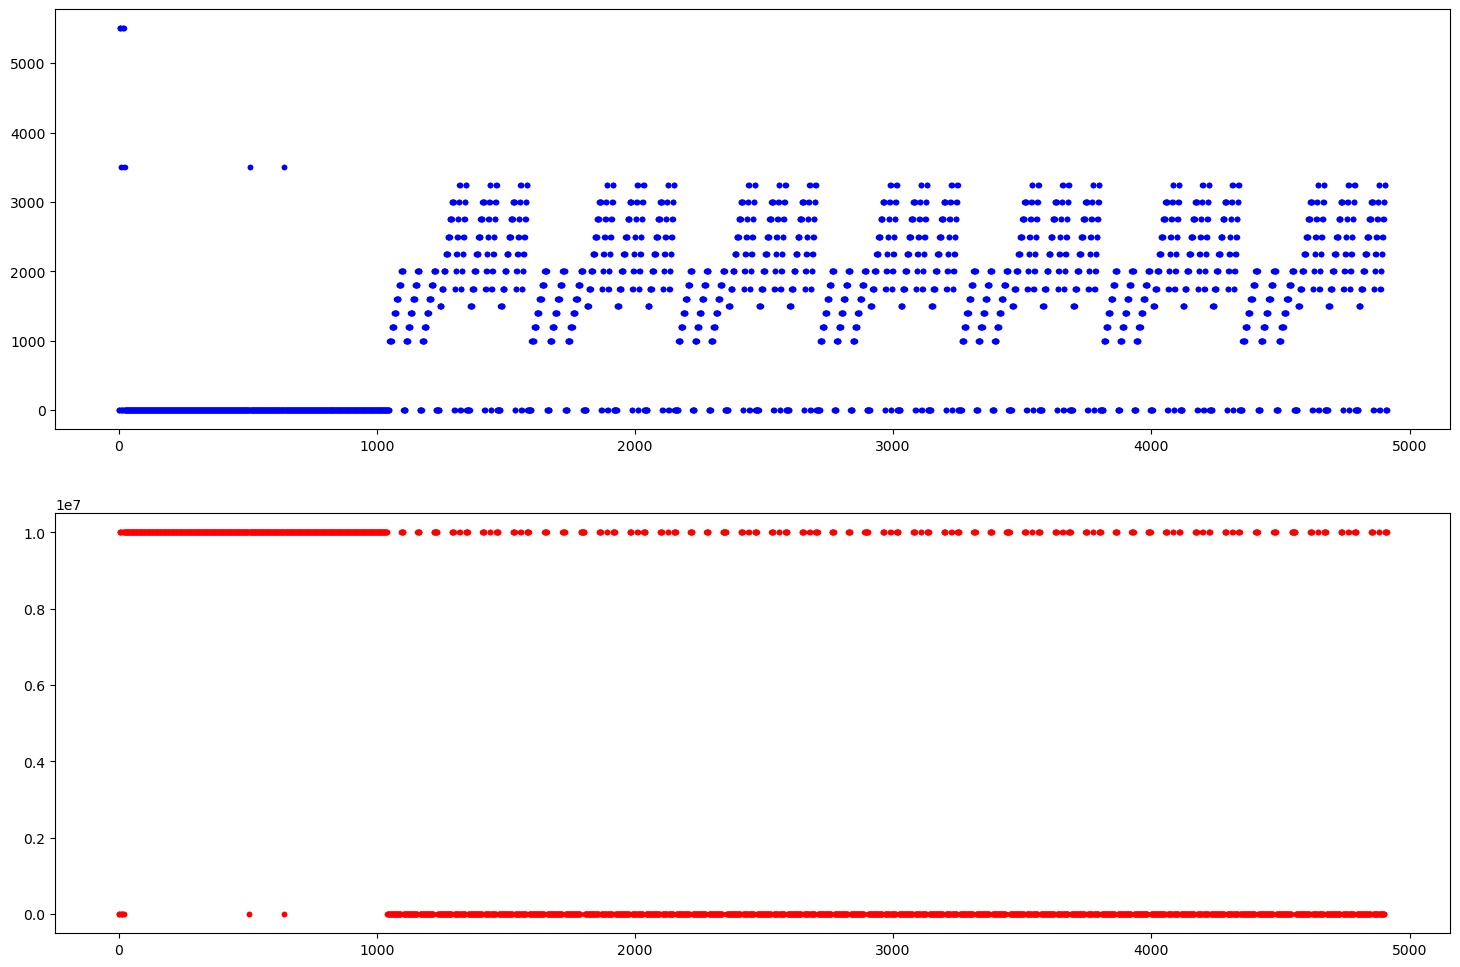

In [36]:
fig = plt.figure(figsize=(18, 12))
fig.add_subplot(2, 1, 1)
plt.plot(df.index, min_car_weight, 'b.', label='min_weight')

fig.add_subplot(2, 1, 2)
plt.plot(df.index, max_car_weight, 'r.', label='max_weight');

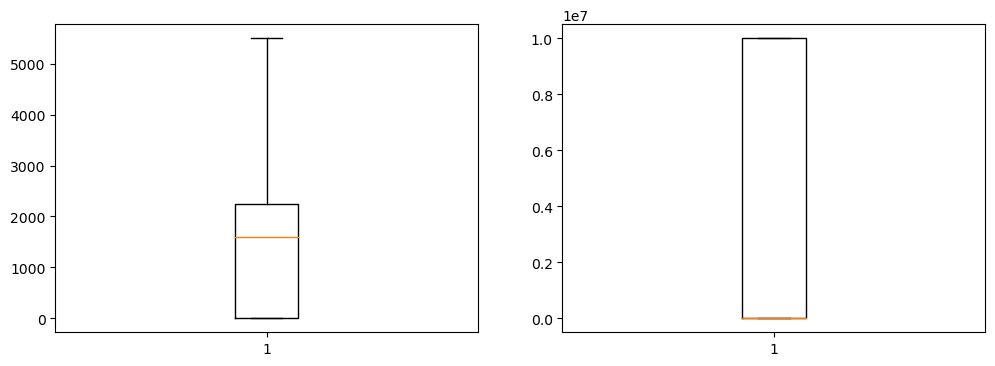

In [40]:
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(1, 2, 1)
plt.boxplot(min_car_weight)

fig.add_subplot(1, 2, 2)
plt.boxplot(max_car_weight);

### pandas option

In [159]:
pd.options.display.float_format = '{:.5}'.format
# pd.reset_option('display.float_format')
# pd.set_option('display.float_format', None)

### 일산화탄소-기준치

In [160]:
df['일산화탄소-기준치'].unique()

array([' ', '1', '1.2', '4.5', '2.5', '시내', '0.77', '1.22', '1.83',
       '0.62', '0.81', '0.99', '1.47', '0.52', '0.67', '0.82', '1.21',
       '0.46', '0.6', '0.73', '1.08', '0.41', '0.53', '0.65', '0.94',
       '0.38', '0.49', '0.87', '0.35', '0.45', '0.55', '0.79', '2.4',
       '4.2', '0.48', '0.76', '2.2', '1.84', '2.19', '2.91', '0.43',
       '0.69', '2.6', '1.64', '1.96', '1.41', '1.68', '2.22', '1.28',
       '1.52', '2.01', '0.42', '0.51', '1.17', '1.38', '1.39', '1.82',
       '1.05', '1.24', '1.62', '0.96', '1.13', '1.14', '1.49', '0.34',
       '0.89', '1.37', '1.89', '2.51', '1.04', '1.36', '1.3', '1.59',
       '2.38', '1.29', '1.91', '0.68', '1.07', '1.57', '0.78', '1.4',
       '0.95', '0.85', '0.64', '0.59', '0.72', '1.03', '1.56', '3.12',
       '5.46', '2.39', '2.85', '2.86', '3.78', '0.56', '0.9', '2.13',
       '2.55', '3.38', '2.18', '2.89', '1.66', '1.98', '2.61', '0.66',
       '1.79', '1.81', '2.37', '1.61', '2.11', '1.25', '1.48', '1.94',
       '0.44', '1

In [161]:
df['일산화탄소-기준치'].value_counts()

        322
4.5     228
1       213
1.2     206
2.5     182
       ... 
1.66      6
2.86      6
3.78      6
3.38      6
1.29      6
Name: 일산화탄소-기준치, Length: 120, dtype: int64

In [162]:
co_basic = df['일산화탄소-기준치'].copy()

In [163]:
co_basic = co_basic.replace(' ', np.nan)
co_basic.unique()

array([nan, '1', '1.2', '4.5', '2.5', '시내', '0.77', '1.22', '1.83',
       '0.62', '0.81', '0.99', '1.47', '0.52', '0.67', '0.82', '1.21',
       '0.46', '0.6', '0.73', '1.08', '0.41', '0.53', '0.65', '0.94',
       '0.38', '0.49', '0.87', '0.35', '0.45', '0.55', '0.79', '2.4',
       '4.2', '0.48', '0.76', '2.2', '1.84', '2.19', '2.91', '0.43',
       '0.69', '2.6', '1.64', '1.96', '1.41', '1.68', '2.22', '1.28',
       '1.52', '2.01', '0.42', '0.51', '1.17', '1.38', '1.39', '1.82',
       '1.05', '1.24', '1.62', '0.96', '1.13', '1.14', '1.49', '0.34',
       '0.89', '1.37', '1.89', '2.51', '1.04', '1.36', '1.3', '1.59',
       '2.38', '1.29', '1.91', '0.68', '1.07', '1.57', '0.78', '1.4',
       '0.95', '0.85', '0.64', '0.59', '0.72', '1.03', '1.56', '3.12',
       '5.46', '2.39', '2.85', '2.86', '3.78', '0.56', '0.9', '2.13',
       '2.55', '3.38', '2.18', '2.89', '1.66', '1.98', '2.61', '0.66',
       '1.79', '1.81', '2.37', '1.61', '2.11', '1.25', '1.48', '1.94',
       '0.44', '1

In [164]:
co_basic.value_counts()

4.5     228
1       213
1.2     206
2.5     182
0.46    153
       ... 
1.66      6
2.86      6
3.78      6
3.38      6
1.29      6
Name: 일산화탄소-기준치, Length: 119, dtype: int64

In [165]:
co_basic.dtype

dtype('O')

In [166]:
co_basic = pd.to_numeric(co_basic, errors='coerce')
co_basic.dtype

dtype('float64')

In [196]:
co_basic.shape

(4913,)

In [167]:
co_basic.describe()

count   4575.0
mean    1.3773
std     1.0026
min       0.34
25%       0.62
50%       1.14
75%       1.78
max       5.46
Name: 일산화탄소-기준치, dtype: float64

In [168]:
co_basic.value_counts(bins=10)

(0.334, 0.852]    1626
(0.852, 1.364]    1160
(1.364, 1.876]     791
(1.876, 2.388]     366
(2.388, 2.9]       333
(4.436, 4.948]     228
(2.9, 3.412]        41
(3.924, 4.436]      16
(4.948, 5.46]        8
(3.412, 3.924]       6
Name: 일산화탄소-기준치, dtype: int64

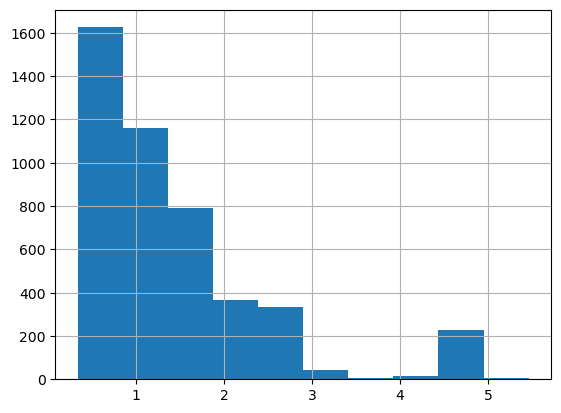

In [169]:
co_basic.hist();

### 탄화수소-기준치

In [170]:
df.columns

Index(['검사방법', '연료', '적용법령', '차종', '제작시작일자', '제작종료일자', '적용시작일자', '적용종료일자',
       '차량최소중량', '차량최대중량', '일산화탄소-기준치', '탄화수소-기준치', '질소산화물-기준치', '매연-기준치',
       '매연-기준치(촉매)'],
      dtype='object')

In [171]:
df['탄화수소-기준치'].describe()

count     4913
unique      48
top        100
freq       438
Name: 탄화수소-기준치, dtype: object

In [172]:
df['탄화수소-기준치'].unique()

array([' ', '120', '220', '1200', '150', '400', '59', '180', '140', '210',
       '280', '49', '110', '170', '230', '42', '100', '190', '37', '90',
       '130', '33', '80', '30', '70', '60', '390', '1090', '200', '160',
       '234', '273', '370', '195', '221', '300', '156', '182', '250',
       '143', '169', '104', '117', '270', '500', '1410', '240', '260'],
      dtype=object)

In [173]:
ch_basic = df['탄화수소-기준치'].copy()

In [174]:
ch_basic = pd.to_numeric(ch_basic, errors='coerce')
ch_basic.dtype

dtype('float64')

In [198]:
ch_basic.shape

(4913,)

In [203]:
ch_basic.describe()

count   4575.0
mean    206.05
std     251.75
min       30.0
25%      100.0
50%      140.0
75%      180.0
max     1410.0
Name: 탄화수소-기준치, dtype: float64

In [201]:
ch_basic.notnull().sum()

4575

In [175]:
ch_basic.value_counts(bins=10)

(28.619, 168.0]     3060
(168.0, 306.0]      1035
(1134.0, 1272.0]     228
(306.0, 444.0]       220
(996.0, 1134.0]       16
(444.0, 582.0]         8
(1272.0, 1410.0]       8
(582.0, 720.0]         0
(720.0, 858.0]         0
(858.0, 996.0]         0
Name: 탄화수소-기준치, dtype: int64

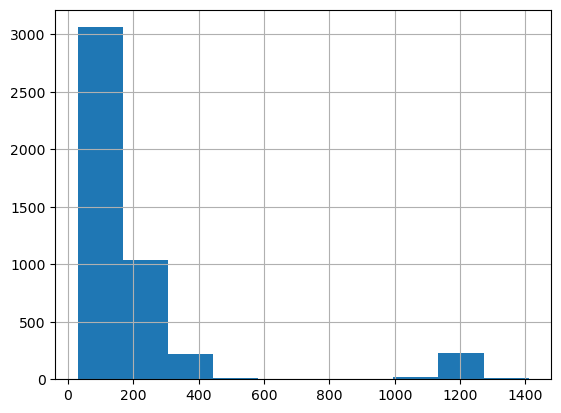

In [176]:
ch_basic.hist();

In [177]:
df.columns

Index(['검사방법', '연료', '적용법령', '차종', '제작시작일자', '제작종료일자', '적용시작일자', '적용종료일자',
       '차량최소중량', '차량최대중량', '일산화탄소-기준치', '탄화수소-기준치', '질소산화물-기준치', '매연-기준치',
       '매연-기준치(촉매)'],
      dtype='object')

### 질소산화물-기준치

In [178]:
df['질소산화물-기준치'].describe()

count     4913
unique     124
top           
freq      1038
Name: 질소산화물-기준치, dtype: object

In [179]:
df['질소산화물-기준치'].unique()

array([' ', '2000', '1080', '1400', '1030', '1100', '1550', '1800',
       '1990', '850', '830', '870', '1240', '1120', '1440', '1590', '690',
       '720', '730', '930', '1190', '1310', '610', '630', '660', '910',
       '820', '1050', '1160', '530', '550', '600', '800', '920', '1010',
       '490', '500', '840', '440', '450', '760', '1640', '2110', '950',
       '1260', '1210', '1470', '590', '1320', '1000', '860', '960',
       '1130', '560', '570', '770', '1020', '510', '700', '780', '460',
       '670', '620', '810', '420', '740', '380', '520', '580', '1500',
       '1720', '1950', '1330', '1530', '1370', '1090', '1230', '990',
       '1040', '1860', '1680', '2160', '2390', '1490', '1344', '1728',
       '1910', '880', '1116', '1428', '1580', '790', '984', '640', '864',
       '1104', '1220', '792', '1008', '912', '1960', '2530', '1140',
       '1450', '1350', '1510', '1770', '1300', '1200', '750', '1150',
       '680', '940', '970', '890', '2070', '2340', '1830', '1430', '1290',


In [180]:
no_basic = df['질소산화물-기준치'].copy()
no_basic = pd.to_numeric(no_basic, errors='coerce')
no_basic.value_counts()

1240.0    156
660.0     105
920.0     102
1120.0     93
810.0      87
         ... 
1770.0      6
1510.0      6
1008.0      6
912.0       6
2000.0      2
Name: 질소산화물-기준치, Length: 123, dtype: int64

In [202]:
no_basic.shape

(4913,)

In [181]:
no_basic.describe()

count   3875.0
mean    1007.7
std     406.19
min      380.0
25%      690.0
50%      930.0
75%     1240.0
max     2530.0
Name: 질소산화물-기준치, dtype: float64

In [182]:
no_basic.value_counts(bins=10)

(595.0, 810.0]                 909
(1025.0, 1240.0]               789
(810.0, 1025.0]                735
(377.84900000000005, 595.0]    567
(1240.0, 1455.0]               297
(1455.0, 1670.0]               268
(1670.0, 1885.0]               169
(1885.0, 2100.0]                85
(2100.0, 2315.0]                30
(2315.0, 2530.0]                26
Name: 질소산화물-기준치, dtype: int64

### 매연-기준치

In [183]:
df['매연-기준치'].describe()

count     4668
unique      14
top           
freq      4330
Name: 매연-기준치, dtype: object

In [184]:
df['매연-기준치'].unique()

array(['20', '50', '60', '70', '15', '30', '45', '35', '25', '40', ' ',
       '10', '55', '8', nan], dtype=object)

In [185]:
ex_basic = df['매연-기준치'].copy()
ex_basic = pd.to_numeric(ex_basic, errors='coerce')
ex_basic.value_counts()

20.0    70
45.0    62
60.0    54
40.0    43
55.0    32
10.0    26
30.0    12
25.0    10
15.0     9
35.0     8
50.0     6
8.0      4
70.0     2
Name: 매연-기준치, dtype: int64

In [204]:
ex_basic.shape

(4913,)

In [186]:
ex_basic.describe()

count    338.0
mean    37.476
std     16.822
min        8.0
25%       20.0
50%       40.0
75%       55.0
max       70.0
Name: 매연-기준치, dtype: float64

<AxesSubplot:>

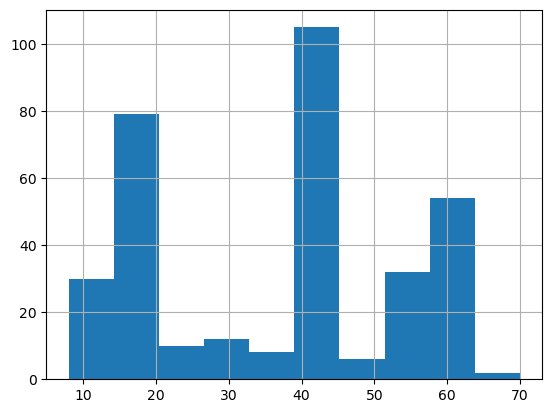

In [187]:
ex_basic.hist()

### 매연-기준치(촉매)

In [188]:
df.columns

Index(['검사방법', '연료', '적용법령', '차종', '제작시작일자', '제작종료일자', '적용시작일자', '적용종료일자',
       '차량최소중량', '차량최대중량', '일산화탄소-기준치', '탄화수소-기준치', '질소산화물-기준치', '매연-기준치',
       '매연-기준치(촉매)'],
      dtype='object')

In [189]:
df['매연-기준치(촉매)'].unique()

array([' ', '15', '25', '45', '50', '60', '65', nan], dtype=object)

In [190]:
ex2_basic = df['매연-기준치(촉매)'].copy()
ex2_basic = pd.to_numeric(ex2_basic, errors='coerce')
ex2_basic.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4913 entries, 0 to 4912
Series name: 매연-기준치(촉매)
Non-Null Count  Dtype  
--------------  -----  
260 non-null    float64
dtypes: float64(1)
memory usage: 38.5 KB


In [195]:
ex2_basic.shape

(4913,)

In [191]:
ex2_basic.describe()

count    260.0
mean    43.846
std     16.446
min       15.0
25%       25.0
50%       50.0
75%       60.0
max       65.0
Name: 매연-기준치(촉매), dtype: float64

In [192]:
ex2_basic.value_counts()

60.0    64
25.0    58
50.0    56
45.0    36
15.0    26
65.0    20
Name: 매연-기준치(촉매), dtype: int64

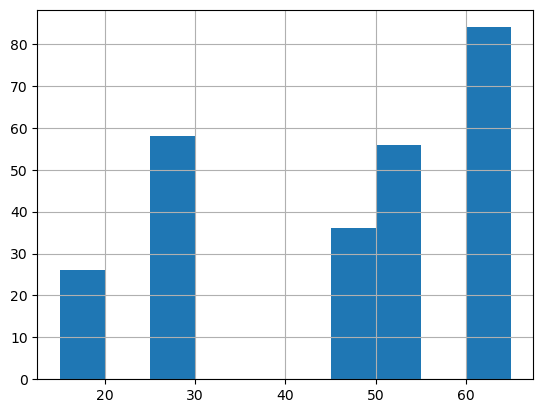

In [193]:
ex2_basic.hist();

# 코드 마지막